In [1]:
import random as rd
import math as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d.axes3d import Axes3D

## Problema 1:

Um algoritmo para métodos do tipo Monte Carlo tem uma proposta (dentre outras) de gerar pontos aleatórios para uma dada região cuja resposta ótima se deseja investigar. Como problemas de otimização envolvem encontrar máximos e mínimos de uma função, a utilidade do método é prevenir que o algoritmo dê uma resposta de máximo ou mínimo local, quando na verdade se deseja o valor global.

Essa confusão dos algoritmos entre ótimos locais e globais acontece porque muitos deles são iterativos e fazem uma "busca de campo" pelas suas redondezas. Isto quer dizer que eles são "inteligentes", no sentido de que usam resultados anteriores para inferir o provável melhor resultado futuro. O problema é que dependendo da posição onde se está, ou o passo, o feedback das redondezas leva a conclusões erradas, tornando o método enviesado. O Hooke-Jeeves implementado na Semana 4 é um desses algoritmos enviesados.

Integrando o Monte Carlo ao Hooke-Jeeves, teremos o primeiro gerando vários pontos iniciais aleatórios, ao longo de toda a área de busca. O segundo irá encontrar o valor ótimo para cada um desses pontos gerados. No final, você percorre uma lista com esses diferentes valores ótimos encontrados e seleciona o maior ou menor deles, a depender se você estava buscando o máximo ou mínimo, respectivamente.

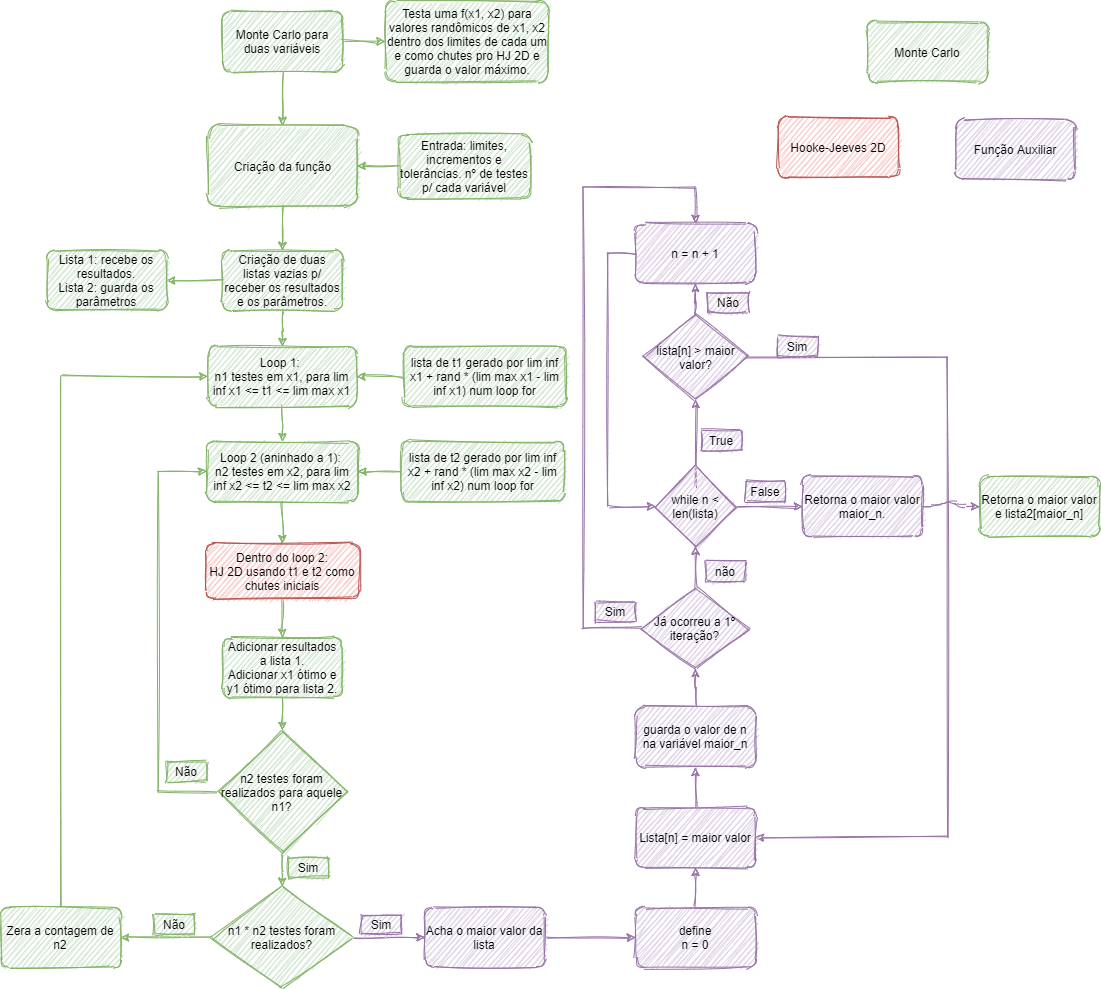

Siga o pseudocódigo acima para implementar o seu algoritmo Monte-Carlo e o teste para o problema 3 da semana 4

$$ \beta = a + b \cdot Ext + c \cdot pH - d \cdot Ext \cdot pH - e \cdot {Ext}^2 + f \cdot {pH}^2 + g \cdot {Ext}^2 \cdot pH + h \cdot Ext \cdot {pH}^2 $$

Dica: comece usando o seu algoritmo para apenas 1 chute inicial (um par ordenado (x,y) gerado aleatoriamente), e fique *spammando* a chamada da função Monte Carlo. Você vai notar que existe um máximo local p/ o qual a função converge quando ela cai numa região de baixo pH e alta fração volumétrica de extratante. Isso é mais intuitivo olhando o gráfico abaixo.

In [24]:
a = 1.26105
b = 0.5340
c = 0.491092
d = 2.383
e = 12.1
f = 2.5209
g = -7.6
h = -9.89

Para gerar valores aleatórios, importe a biblioteca **random** do Python. Nessa biblioteca, pegue o método **random**, que irá gerar valores aleatórios de 0 a 1. Assim:

In [25]:
random = rd.random() 
# a variável "random" é uma função que gera valores aleatórios obtidos da função "random()", da biblioteca "random" (que foi apelidada de "rd" no import (lá em cima)).
random # aperta ctrl + enter e fique spammando valores aleatórios p/ vc ver como é

0.9495550896302838

In [26]:
def acha_maior(lista_valores, retorna_n = False):
    
    n = 0
    posicao_maior = 0
    maior_valor = lista_valores[n] 
    
    while n < len(lista_valores):
        if lista_valores[n] > maior_valor:
            maior_valor = lista_valores[n]
            posicao_maior = n            
        n += 1
    
    if retorna_n:
        return maior_valor, posicao_maior
    else:
        return maior_valor    
    
def hooke_jeeves_2d(z, chute_x, incremento_x, tolerancia_x, lim_inf_x, lim_sup_x,
                    chute_y, incremento_y, tolerancia_y, lim_inf_y, lim_sup_y):
        
    while (incremento_x > tolerancia_x or incremento_y > tolerancia_y):
        
        f1 = z(chute_x, chute_y)
        
        if chute_x + incremento_x <= lim_sup_x:
            f2 = z(chute_x + incremento_x, chute_y)
        else:
            f2 = -m.inf
            
        if chute_x - incremento_x >= lim_inf_x:
            f3 = z(chute_x - incremento_x, chute_y)
        else:
            f3 = -m.inf
            
        if chute_y + incremento_y <= lim_sup_y:            
            f4 = z(chute_x, chute_y + incremento_y)
        else:
            f4 = -m.inf
            
        if chute_y - incremento_y >= lim_inf_y:
            f5 = z(chute_x, chute_y - incremento_y)
        else:
            f5 = -m.inf
        
        maior = acha_maior([f1, f2, f3, f4, f5])
        #note p/ fazer um Hooke-Jeeves que acha o mínimo, eu só deveria trocar essa função para uma "acha_menor".
        #e trocar "-m.inf" por "m.inf"
        
        if maior == f1:            
            incremento_x /= 2
            incremento_y /= 2
            
        else:
            if maior == f2:
                chute_x += incremento_x
            elif maior == f3:
                chute_x -= incremento_x
            elif maior == f4:
                chute_y += incremento_y
            else:
                chute_y -= incremento_y
    
    return f1, chute_x, chute_y    

def monte_carlo(z, nx, incremento_x, tolerancia_x, lim_inf_x, lim_sup_x,
                ny, incremento_y, tolerancia_y, lim_inf_y, lim_sup_y):
    
    resultados_funcao = []
    parametros_funcao = []
    lista_tx = [lim_inf_x + rd.random() * (lim_sup_x - lim_inf_x) for tx in range(nx)]
    lista_ty = [lim_inf_y + rd.random() * (lim_sup_y - lim_inf_y) for ty in range(ny)]
    
    for tx in lista_tx:
        for ty in lista_ty:
            f, x_max, y_max = hooke_jeeves_2d(z, tx, incremento_x, tolerancia_x, lim_inf_x, lim_sup_x,
                                               ty, incremento_y, tolerancia_y, lim_inf_y, lim_sup_y)
            
            resultados_funcao.append(f)
            parametros_funcao.append((x_max, y_max))
            
    maior_valor, n = acha_maior(resultados_funcao, retorna_n = True)
    return maior_valor, parametros_funcao[n]   

In [27]:
beta = lambda pH, ext: a + b*ext + c*pH + d*ext*pH + e*ext**2 + f*pH**2 + g*ext**2*pH + h*ext*pH**2

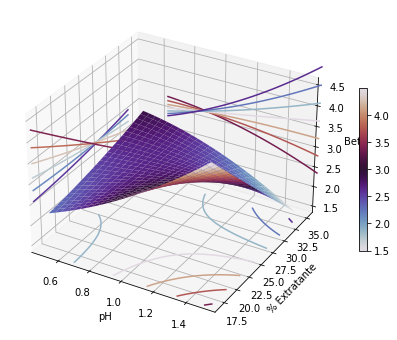

In [28]:
pH = np.linspace(0.5, 1.5, 100)
ext = np.linspace(0.17, 0.35, 100)
pH_grid, ext_grid = np.meshgrid(pH, ext)
beta_grid = beta(pH_grid, ext_grid)

fig = plt.figure(figsize=(20,6))    
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(pH_grid, ext_grid*100, beta_grid, cmap=mpl.cm.twilight, rstride=4, cstride=4, linewidth=0)
cset = ax.contour(pH_grid, ext_grid*100, beta_grid, offset=1.2, zdir='z', cmap=mpl.cm.twilight_shifted)
cset = ax.contour(pH_grid, ext_grid*100, beta_grid, offset=0.4, zdir='x', cmap=mpl.cm.twilight_shifted)
cset = ax.contour(pH_grid, ext_grid*100, beta_grid, offset=40, zdir='y', cmap=mpl.cm.twilight_shifted)
ax.set_xlabel('pH')
ax.set_ylabel('% Extratante')
ax.set_zlabel('Beta')
cb = fig.colorbar(p, shrink=0.5)

In [29]:
monte_carlo(beta, 1, 0.1, 0.001, 0.5, 1.5, 1, 0.03, 0.003, 0.17, 0.35)

(4.596077630693928, (1.4991848969078148, 0.17037924218292744))

## Problema 2:

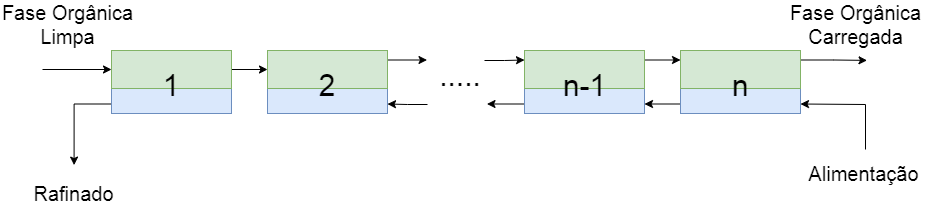

Num processo de separação por extração com solvente, dado que você conheça:

**condições que você impõe como operador:**

- a razão entre as fases;
- e o número de estágios de separação; 

**condição obtidas experimentalmente:**

[Razão de distribuição (D)](https://pt.wikipedia.org/wiki/Coeficiente_de_parti%C3%A7%C3%A3o) das substâncias nas fases;

**Uma concentração final (saindo no rafinado) ou inicial (entrando na alimentação):**

- se for *setada* uma concentração final (que sai da **célula 1**), temos uma meta de recuperação;
- se for *setada* uma concentração inicial (que entra na **célula n**), temos uma condição que o operador impõe;

*Nota: se você escolher tanto as concentrações final e inicial, você deverá abrir mão de outro parâmetro, do contrário faltará graus de liberdade ao sistema.*


Se você escolher setar a concentração final, você pode inferir as concentrações das espécies em cada estágio e, consequentemente na saída da operação, desde que D se mantenha constante ao longo do processo, como segue:

$$ A_2 = {A_1 \cdot (E + 1)} $$
$$ A_3 = {A_1 \cdot (E^2 + E + 1)} = A_1 E^2 + A_2 $$ 
$$ A_4 = {A_1 \cdot (E^3 + E^2 + E + 1)} = A_1 E^3 + A_3 $$
$$ \vdots $$
$$ A_{n-1} = {A_1 \cdot (E^{n-2} + E^{n-3} + \dots + E^2 + E + 1)} = A_1 E^{n-2} + A_{n-2} $$ 
$$ A_{n} = {A_1 \cdot (E^{n-1} + E^{n-2} + \dots + E^2 + E + 1)} = A_1 E^{n-1} + A_{n-1} $$
$$ A_{F} = {A_1 \cdot (E^n + E^{n-1} + E^{n-2} + \dots + E^2 + E + 1)} = A_1 E^{n} + A_{n} $$

$A$ é uma das espécies químicas sendo separadas.  
$A_1$ **sai** da célula 1.   
$A_2$ **sai** da célula 2.  
$A_3$ **sai** da célula 3.  
$ \vdots $  
$A_{n-1}$ **sai** da célula n-1.  
$A_{n}$ **sai** da célula n.  
$A_{F}$ **ENTRA** da célula n.  

$E$ é o *fator de extração*:

$E = R \cdot D$

Onde R é a razão volumétrica entre as fases aquosa e orgânica (Razão A/O).

Tendo ciência das concentrações resultantes, você pode ajustar os parâmetros do seu processo para atingir seus objetivos:

- de maior pureza (componente menos extraído que sai no rafinado);
- de menor custo (menor número de estágios, pH menos ácido, menor consumo de extratante, etc.);
- de menores perdas (uma menor parte do componente que é purificado será perdido para a fase orgânica);

Com base na proposta, crie um algoritmo que seja capaz de encontrar a concentração na fase aquosa de uma dada espécie por recursão, uma vez que conhecemos a saída na célula 1 ($A_1$).

Estes são os dados experimentais obtidos em escala de bancada e as condições operacionais simuladas para a realização de operação em escala piloto:

$R = 0.5$
$Nº Estágios = 10$
$D_{Nd} = 0.06$
$D_{Sm} = 0.89$

$A_{1 Sm} = 1.1 \cdot 10^{-3}g/L$  
$A_{1 Nd} = 7.22g/L$.

In [39]:
R = 0.5
Dnd = 0.66
Dsm = 3.61
End = R*Dnd
Esm = R*Dsm
nEstagios = 10
a1nd = 7.22
a1sm = 1.1e-3

In [31]:
def concentracoesNasCelulas(a1, E, nEstagios):
    # a partir da concentração no rafinado, determina as concentrações nos demais estágios
    resultados = []

    def calculaConcentracoes(a1, E, nEstagios):
    
        if nEstagios == 2:
            a = a1*(1+E)        
            resultados.extend([a1, a])
            #é o mesmo que:        
            #resultados.append(a1)
            #resultados.append(a)
            return a
        else:
            a = a1*E**(nEstagios-1) + calculaConcentracoes(a1, E, nEstagios-1)
            resultados.append(a)
            return a

    an = calculaConcentracoes(a1, E, nEstagios)
    af = a1*E**nEstagios + an
    resultados.append(af)

    return resultados

In [34]:
concentracoesSm, concentracoesNd = concentracoesNasCelulas(a1sm, Esm, nEstagios), concentracoesNasCelulas(a1nd, End, nEstagios)

In [35]:
concentracoesSm, concentracoesNd

([0.0011,
  0.0030854999999999997,
  0.0066693275,
  0.0131381361375,
  0.024814335728187496,
  0.04588987598937843,
  0.08393122616082807,
  0.15259586322029467,
  0.27653553311263185,
  0.5002466372683005,
  0.9040451802692824],
 [7.22,
  9.6026,
  10.388858,
  10.64832314,
  10.7339466362,
  10.762202389946001,
  10.77152678868218,
  10.77460384026512,
  10.77561926728749,
  10.775954358204872,
  10.77606493820761])

## Problema 3:

Se você escolher setar a concentração *inicial* ($A_F$, que *entra* na célula n), então você pode obter a concentração que sai na célula 1 e nas demais células como segue:

$ A_n = A_F {\sum\limits_{i=0}^{n-1} E^i \over \sum\limits_{i=0}^{n} E^i}$
$ \qquad ;$
$ A_{n-1} = A_n {\sum\limits_{i=0}^{n-2} E^i \over \sum\limits_{i=0}^{n-1} E^i}$
$ \qquad ;$
$ A_{n-2} = A_{n-1} {\sum\limits_{i=0}^{n-3} E^i \over \sum\limits_{i=0}^{n-2} E^i}$
$ \quad $
$ \dots $
$ \quad $
$ A_3 = A_4 {\sum\limits_{i=0}^{2} E^i \over \sum\limits_{i=0}^{3} E^i}$
$ \qquad ;$
$ A_2 = A_3 {E + 1 \over E^2 + E + 1}$
$ \qquad ;$
$ A_1 = A_2{1 \over E + 1}$

Uma boa forma de conferir (mas não garantir) que o seu código está correto, é pegar o resultado da última célula do problema acima e usar como $A_F$ aqui.

Use 

$A_{F Sm} = 0.904 g/L$ e
$A_{F Nd} = 10.776 g/L$


In [37]:
def concentracoesNasCelulas2(af, E, nEstagios):
    # a partir da concentração na alimentação, determina as concentrações nos demais estágios
    resultados = []
    def calculaConcentracoes (af, E, nEstagios, j = 1):
        # j é uma variável dummy, sem qualquer significado físico
        
        somatorioNumerador = 0
        for iterador in range(j):
            somatorioNumerador += E**iterador

        somatorioDenominador = E**j + somatorioNumerador
        
        if j == nEstagios:
            a = af * somatorioNumerador/somatorioDenominador
            resultados.extend([af, a])
            return a
        else:
            a = calculaConcentracoes(af, E, nEstagios, j+1) * somatorioNumerador/somatorioDenominador
            resultados.append(a)
            return a

    calculaConcentracoes(af, E, nEstagios)
    return resultados

In [38]:
afsm, afnd = concentracoesNasCelulas(a1sm, Esm, nEstagios)[-1], concentracoesNasCelulas(a1nd, End, nEstagios)[-1]
concentracoesNasCelulas2(afsm, Esm, nEstagios), concentracoesNasCelulas2(afnd, End, nEstagios)

([0.9040451802692824,
  0.5002466372683005,
  0.2765355331126319,
  0.15259586322029473,
  0.0839312261608281,
  0.045889875989378444,
  0.024814335728187507,
  0.013138136137500003,
  0.0066693275000000015,
  0.0030855000000000006,
  0.0011000000000000003],
 [10.77606493820761,
  10.775954358204874,
  10.775619267287494,
  10.774603840265124,
  10.771526788682184,
  10.762202389946005,
  10.733946636200004,
  10.648323140000006,
  10.388858000000006,
  9.602600000000006,
  7.220000000000004])

## Problema 4:

O primeiro passo para se achar as condições ótimas de um processo envolve a determinação dos coeficientes de partição que gerem um fator de separação ótimo, que é apenas a razão da razão de distribuição de duas espécies a serem separadas (Problema 2 - Semana 2). Isso é feito em experimentos de bancada testando, por exemplo, diferentes concentrações de extratante e pH (Problema 3 - Semana 4).

Depois, tendo em vista critérios econômicos, pureza e recuperação, as variáveis operacionais são setadas, definido a meta de pureza ($A_1$ do componente que deve **sair** da corrente rafinada) e meta de recuperação ($A_1$ do componente que deve **ficar** na corrente rafinada).

Essas variáveis operacionais são, geralmente, o número de estágios de separação e a razão volumétrica (Razão A/O ou $R$) entre as fases. Um jeito bem simples e eficaz de se encontrar um valor ótimo para as variáveis, quando o número de cálculos não é grande demais para isso, é usar a **força bruta**. Os métodos de força bruta são o contrário dos métodos inteligentes, eles não usam a influência do meio para tomarem decisões, mas, por causa disso, também não são enviesados. A força bruta passa por **todas** as condições possíveis e guarda a condição ótima.

A pureza($P$) de uma espécie $A$ de uma fase, numa determinada célula, pode ser obtida como segue:

$$P = {A \over A + B}$$

E a recuperação ($\phi$) de $A$ é a quantidade de produto puro que sai na célula $A_1$, em relação a quantidade de matéria que entra ($A_F$):

$$\phi = {A_1 \over A_F}$$

Usando a função que encontra $A_1$ quando se tem $A_F$, obtenha a melhor condição de operação testando para um número de estágios de vai de 2 a 12, variando de 1 em 1 e uma  razão A/O que vai de 0.5 a 2, variando de 0.1 em 0.1.

A melhor condição de operação avaliando apenas recuperação e pureza é aquela que obtem uma pureza mínima de 99.5% (critério de eliminação) e o máximo de recuperação (critério de otimização). 

No nosso contexto, Nd é $A$ (o elemento que deve ficar no rafinado) e Sm é $B$ (o elemento que deve sair dele). Use as concentrações dadas no problema 3.


In [76]:
pureza = lambda a1, b1: a1/(a1+b1)
recuperacao = lambda a1, af: a1/af

razoes_ao = [x/10 for x in range(5, 21)]
ns_estagios = range(2, 11)

def achaParametrosOtimos(razoes_ao, ns_estagios):

    maiorRecuperacao = 0
    purezaDaMaiorRecuperacao = 0
    razao_aoOtima = 0
    n_estagiosOtimo = 0

    for razao_ao in razoes_ao:
        for n_estagios in ns_estagios:

            End = razao_ao*Dnd
            Esm = razao_ao*Dsm
            concentracoesNd = concentracoesNasCelulas2(afnd, End, n_estagios)
            concentracoesSm = concentracoesNasCelulas2(afsm, Esm, n_estagios)
            ndf, nd1 = concentracoesNd[0], concentracoesNd[-1]
            sm1 = concentracoesSm[-1]
            pureza_nd = pureza(nd1, sm1)

            if pureza_nd >= 0.995:
                recuperacao_nd = recuperacao(nd1, ndf)

                if recuperacao_nd > maiorRecuperacao:
                    maiorRecuperacao = recuperacao_nd
                    purezaDaMaiorRecuperacao = pureza_nd
                    razao_aoOtima = razao_ao
                    n_estagiosOtimo = n_estagios

    return maiorRecuperacao, purezaDaMaiorRecuperacao, razao_aoOtima, n_estagiosOtimo


In [77]:
achaParametrosOtimos(razoes_ao, ns_estagios)

(0.6708664024702685, 0.9970113861008818, 0.5, 5)

## Problema 5:

### Derivada de Ordem n:

$$ {f^n(t)} = {\lim _{h \to 0}} {f^{n-1}(t+h) - f^{n-1}(t) \over h}$$

$$ {f^n(t)} = {\lim _{h \to 0}} {1 \over h^n} \sum_{k=0}^{n} (-1)^{k+n} {n \choose k} f(t+kh) $$

*Ao calcular uma derivada de ordem muito alta, lembre-se do erro associado ao ponto flutuante.
Observe a fórmula acima e veja que o termo infinitesimal está sendo potencializado pela ordem. Para ordens superiores, não é difícil entender que a função vai explodir, porque o seu computador só entende a pequenez do passo infinitesimal até certo ponto. Se usar ordens muito altas for necessário, lembre-se de aumentar o valor do passo, para tornar a explosão mais lenta; mas lembre-se também que aumentar o passo é diminuir a precisão. Veja este artigo de [Diferenciação Numérica, na Wikipedia](https://en.wikipedia.org/wiki/Numerical_differentiation).* 

*A segunda fórmula é parcialmente deduzida [aqui](https://math.stackexchange.com/questions/702185/definition-of-the-nth-derivative-first-post). O primeiro link aponta uma dedução neste [livro](https://www.google.com/search?q=Shilov%2C+George.+Elementary+Real+and+Complex+Analysis.&oq=Shilov%2C+George.+Elementary+Real+and+Complex+Analysis.&aqs=chrome.0.69i59.376j0j9&sourceid=chrome&ie=UTF-8).*

Como você pode ver, uma derivada de ordem n também pode ser expressa pela definição de derivada como um limite. A derivada de ordem superior é o coeficiente angular da curva da derivada inferior no tempo. A derivada de $2^a$ irá ser calculada por derivadas de $1^a$ ordem, que será calculada pela função, como segue o exemplo:

$$ {d^2f(t) \over dt^2} = {\lim _{h \to 0}} {f'(t+h) - f'(t) \over h} = {\lim _{h \to 0}} {{f(t+2h) - f(t+h) \over h} - {f(t+h) - f(t) \over h} \over h}$$

A derivada de n-ésima ordem pode ser calculada sem resolver essas expressões, mas sim apenas com uma função que chama a si mesmo para calcular a derivada imediatamente inferior, que repete esse processo até chegar na primeira derivada. Quando ela chegar na primeira, você pode calcular normalmente, como fez no Notebook de Loops For.

Repita o passo a passo que foi feito para calcular as derivadas de $1^a$ ordem:

- Comece calculando a derivada de ordem n para um ponto e depois crie um algoritmo que use essa função para calcular em vários pontos.
- Tente calcular derivadas de ordem 10 ou 20 para algumas funções e veja o que acontece.

Use o seu algoritmo para obter pontos para as 3 primeiras derivadas da função $y = sin(x)$ e a própria função. Depois, plote o seu resultado. Como você também já sabe os valores das derivadas dessa função (caso não saiba, venha [aqui](https://www.derivative-calculator.net/)). Você pode plotar a solução analítica e comparar com a numérica. É importante que o seu método esteja funcionado agora, para que ele seja usado na nossa implementação da Série de Taylor abaixo (Problema 6).

Obtenha as funções seno (e cosseno, para o problema 6 adiante, importanto os métodos **sin** e **cos** da biblioteca **math**).

In [4]:
def contrario(ts):
    # essa função só serve para gerar uma lista de valores negativos em ordem crescente:
    # ex: contrario([1, 2, 3]) ------> [-3, -2, -1]
    ts_contrarios = []
    for i in range(len(ts)):
        ts_contrarios.append(ts[-i-1])
    return ts_contrarios

def derivada_pontual(f, t, h):
    dfdt = (f(t+h)-f(t))/h
    return dfdt

def derivada_n(f, t, h, n):
    
    if n == 0:
        return f(t)
    else:      
        if n == 1:
            return derivada_pontual(f, t, h)  
        else:
            dndt = (derivada_n(f, t+h, h, n-1) - derivada_n(f, t, h, n-1))/h
            return dndt
    
def derivadas_n(f, ts, n):
    derivadas = []
    for i in range(len(ts)-1):
        h = ts[i+1] - ts[i]
        dfdt = derivada_n(f, ts[i], h, n)
        derivadas.append(dfdt)
    return derivadas

ts = contrario([-x/1000 for x in range(1, 10001)]) + [x/10000 for x in range(1, 1001)]
f = lambda x: m.sin(x)
d1fa = lambda x: m.cos(x)
d2fa = lambda x: -m.sin(x)
d3fa = lambda x: -m.cos(x)

# a = sol. analítica, n = sol. numérica

fs = list(map(f, ts[:-1]))
d1fas = list(map(d1fa, ts[:-1]))
d2fas = list(map(d2fa, ts[:-1]))
d3fas = list(map(d3fa, ts[:-1]))
d1fns = derivadas_n(f, ts, 1)
d2fns = derivadas_n(f, ts, 2)
d3fns = derivadas_n(f, ts, 3)

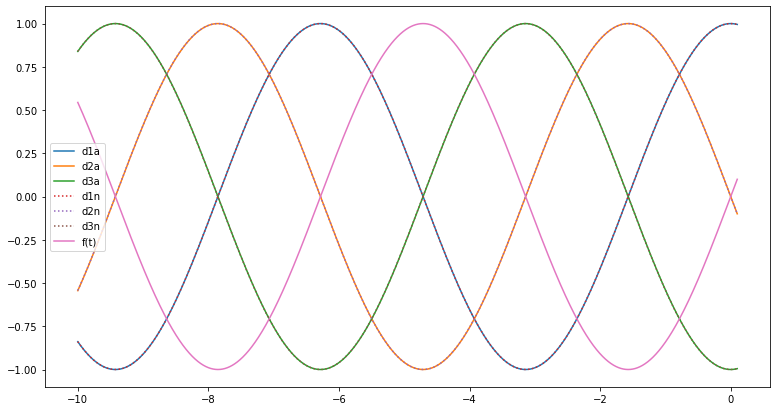

In [5]:
fig = plt.figure(figsize = (13, 7))
grafico = fig.add_subplot(1, 1, 1)
grafico.plot(ts[:-1], d1fas)
grafico.plot(ts[:-1], d2fas)
grafico.plot(ts[:-1], d3fas)
grafico.plot(ts[:-1], d1fns, ':')
grafico.plot(ts[:-1], d2fns, ':')
grafico.plot(ts[:-1], d3fns, ':')
grafico.plot(ts[:-1], fs)
grafico.legend(('d1a', 'd2a', 'd3a', 'd1n', 'd2n', 'd3n', 'f(t)'))

## Problema 6:

### Série de Taylor:

Uma função que atenda a certos pré-requisitos pode ser expandida numa série de potências, resultando num polinômio de ordem $\infty$. Essa série é chamada de Série de Taylor e possui a seguinte forma:

$$ f(t) = f(a) + f'(a)(t - a) + {f''(a)(t - a)^2 \over 2!}+ \ldots + {f^{\infty}(a)(t - a)^\infty \over \infty !} $$

$$ f(t) = \sum_{n = 0}^{\infty} {f^n(a)(t - a)^n \over n!} $$

Lembre-se que:

$$ 0! = 1 $$

A expansão de uma função em série de Taylor é uma ferramenta poderosa para fazer aproximações de funções que são muito trabalhosas de se lidar, ou até mesmo impossíveis com a tecnologia atual. Umas das suas maiores aplicações é transformar um sistema não linear num linear, o que facilita enormemente nossa vida na hora de trabalhar com sistemas de várias equações.

A linearização de um sistema é feita truncando a série de Taylor no termo da primeira derivada, que corresponde à um polinômio de primeira ordem.

$a$ que aparece na fórmula é valor de referência por onde a função será calculada. Se fôssemos calcular os infinitos termos da série, o plot do polinômio resultante seria o mesmo independente do valor de $a$ que escolhêssemos. Entretanto, como usamos a série para fazer aproximações, $a$ se torna mais importante quanto menor for o termo de truncamento da função. 

Para truncamentos de $1^a$ ordem, por exemplo, a aproximação por série de Taylor será uma função de primeiro grau. Se nós tentássemos aproximar $f(t) = sen(t)$ por uma linha reta, é nítido que isso só daria certo até um certo ponto. Se usássemos uma parábola, daria um pouco mais certo, mas também daria errado depois de algum tempo. Se usássemos um polinômio de terceiro grau, ele acompanharia a curva senoide num intervalo maior, até começar a errar. Se usássemos um polinômio de ordem infinita, ele acompanharia **todas** as curvas da senoide.

A imagem abaixo mostra truncamentos em diferentes polinômios, em volta de $a =0$. Note que quanto maior for a ordem do polinômio truncado, melhor a aproximação.

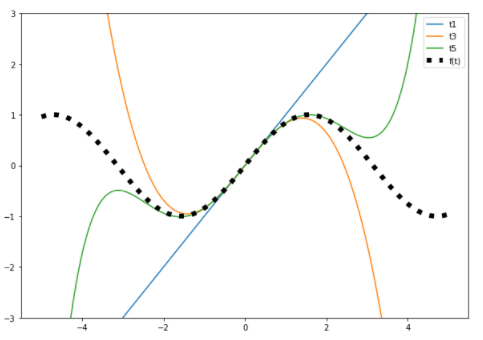

*Atente para o problema do passo infinitesimal descrito para as derivadas, na hora de decidir a melhor ordem para o truncamento. A irônia é que querer precisão demais pode render um resultado absurdo. 
Um jeito relativamente simples de achar o truncamento ótimo é observar a convergência dos valores.*

Vamos fazer nossa Série de Taylor, que recebe a função a ser aproximada, o intervalo de $t$ considerado, o ponto de referência para aproximação ($a$), o incremento de $t$ ($h$) e a ordem do polinômio que será truncado ($n$).

- Crie uma função que calcule o fatorial de um número qualquer
    - Dica: você pode usar recursividade para fazer esse cálculo
- Crie uma função "taylor" que use a função fatorial e a derivada de ordem n, para calcular a aproximação truncada em $n$ para um dado $t$, com $a$ e $h$ conhecidos.
    - Use o mesmo truque que você tem usado para determinar o h através da lista de valores de t.
- Crie uma função "varios_taylors" que usa a função "taylor" para calcular as aproximações para vários valores de t.
    - Note que essa será a função que vai dar os parâmetros para "taylor", que por sua vez irá dar os parâmetros para "fatorial" e "derivada_n".
    
---
Dica:

Teste seu código com a função $f(t) = cos(t)$ e $a = {\pi \over 4}$.

*Se você escolhesse valores $0$, $\pi$ ou ${\pi \over 2}$ você veria algumas aproximações se igualando à outras. Você consegue explicar o porquê?*

R: As derivadas ímpares da função cosseno são funções do tipo seno, que em múltiplos de $\pi$ é $0$, cancelando o respectivo termo da série. Assim, truncamentos pares se igualam aos ímpares, quando $a$ é múltiplo de $\pi$. Em ${\pi \over 2}$ e múltiplos, as derivadas pares seriam 0, porque o cosseno para múltiplos de ${\pi \over 2}$ são zero.

---

Nós podemos brincar um pouco mais com a nossa série de Taylor:

Abaixo temos um modelo de inbição parcial da enzima E, pelo Inibidor I, que ocupa sítios de catálise para a conversão do substrato S no produto P, que embora não impeça, retarda a cinética da reação.

No dado esquema, a velocidade de reação é dada por:


$$ v = { ( k_2[E_0] + { K_4k_6[E_0][I]} ) [S] \over K_m ( 1 + K_3[I] ) + ( 1 + K_5[I] )[S] } $$

$$ K_m = { k_{-1} + k_2 \over k_1 } $$

Compare a série de Taylor truncada e a sua função original, para diferentes valores de $[I]$. Varie $[I]$ de $2 \cdot 10^{-5}$ até $ 5 \cdot 10^{-4} $. Utilize $ 1 \cdot 10^{-4} $ como ponto de referência. 


Demais dados:

$E_0 = 6 \cdot 10^{-4}$M;    
$S = 1 \cdot 10^{-3}$M;  

$ Km = 1.14 \cdot 10^{-1} $M;    
$ k2 = 1.94 \cdot 10^{2} $M;    
$ K3 = 3.22 \cdot 10^{5} $M;    
$ K4 = 2.72 \cdot 10^{3} $M;    
$ K5 = 3.22 \cdot 10^{5} $M;    
$ k6 = 6.94 \cdot 10^{-3} $M;    

In [6]:
def fatorial(i):
    assert type(i) == int
    if i == 0 or i == 1:
        return 1
    else:
        return i*fatorial(i-1)
    
def taylor(f, t, a, h, n): #função, argumento, ponto de referência, passo infinitesimal, ordem do truncamento
    ftaylor = 0
    for i in range(n+1):
        ftaylor += derivada_n(f, a, h, i)*(t-a)**i/fatorial(i)
    return ftaylor

def varios_taylor(f, ts, a, n):
    ftaylors = []
    for i in range(len(ts)-1):
        h = ts[i+1] - ts[i]
        ftaylor = taylor(f, ts[i], a, h, n)
        ftaylors.append(ftaylor)
    return ftaylors

ts = contrario([-x/100 for x in range(1, 501)]) + [x/100 for x in range(1, 501)]
f = lambda x: m.cos(x)
a = m.pi/4
ft1s = varios_taylor(f, ts, a, 1)
ft2s = varios_taylor(f, ts, a, 2)
ft3s = varios_taylor(f, ts, a, 3)
ft4s = varios_taylor(f, ts, a, 4)
ft5s = varios_taylor(f, ts, a, 5)
ft6s = varios_taylor(f, ts, a, 6)
fs = list(map(f, ts[:-1]))

(-3.0, 3.0)

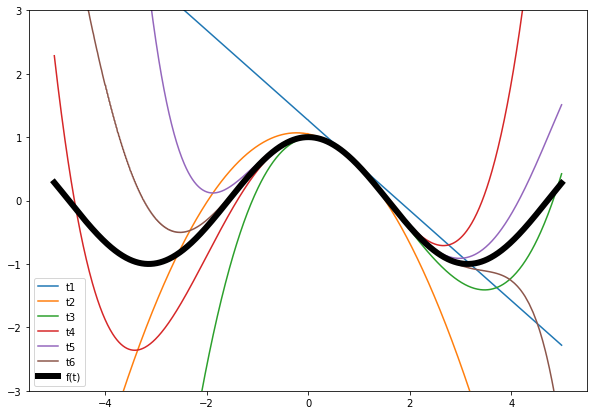

In [7]:
fig = plt.figure(figsize = (10, 7))
grafico = fig.add_subplot(1, 1, 1)
grafico.plot(ts[:-1], ft1s)
grafico.plot(ts[:-1], ft2s)
grafico.plot(ts[:-1], ft3s)
grafico.plot(ts[:-1], ft4s)
grafico.plot(ts[:-1], ft5s)
grafico.plot(ts[:-1], ft6s)
grafico.plot(ts[:-1], fs, color = 'black', linewidth = 6)
grafico.legend(('t1', 't2', 't3', 't4', 't5', 't6', 'f(t)'))
plt.ylim(-3, 3)

$$ v = { ( k_2[E_0] + { K_4k_6[E_0][I]} ) [S] \over K_m ( 1 + K_3[I] ) + ( 1 + K_5[I] )[S] } $$

$$ K_m = { k_{-1} + k_2 \over k_1 } $$

In [97]:
listaI = [1e-6*x for x in range(20, 501)] #M

Km = 1.14e-1 #M
k2 = 1.94e2 #M
K3 = 3.22e5 #M
K4 = 2.72e3 #M
K5 = 3.22e5 #M
k6 = 6.94e-3 #M

E0 = 6e-4 #M
S = 1e-2 #M

v = lambda I: (k2*E0 + K4*k6*E0*I) * S / ( Km*(1 + I*K3) + S*(1 + I*K5) )

vs = list(map(v, listaI[:-1]))
v1s = varios_taylor(v, listaI, a=1e-4, n=1)
v2s = varios_taylor(v, listaI, a=1e-4, n=2)
#v3s = varios_taylor(v, listaI, a=1e-4, n=3)
#v4s = varios_taylor(v, listaI, a=1e-4, n=4)
#v5s = varios_taylor(v, listaI, a=1e-4, n=5)
#v6s = varios_taylor(v, listaI, a=1e-4, n=6)

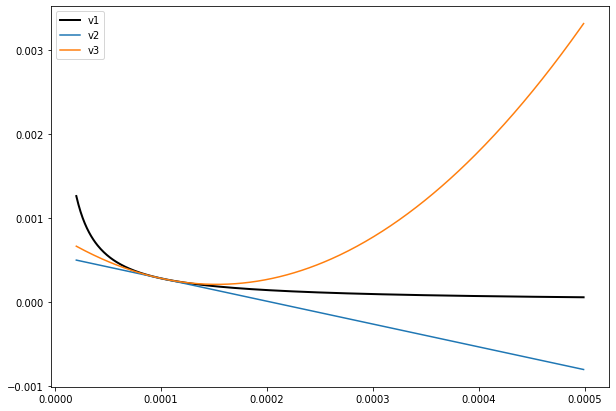

In [98]:
fig = plt.figure(figsize = (10, 7))
grafico = fig.add_subplot(1, 1, 1)
grafico.plot(listaI[:-1], vs, color = 'black', linewidth = 2)
grafico.plot(listaI[:-1], v1s)
grafico.plot(listaI[:-1], v2s)
#grafico.plot(listaI[:-1], v3s)
#grafico.plot(listaI[:-1], v4s)
#grafico.plot(listaI[:-1], v5s)
#grafico.plot(listaI[:-1], v6s)
grafico.legend(('v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'f(t)'))